<a href="https://colab.research.google.com/github/nguyenduychinh/AI_24_02_23/blob/main/ai_31_3_bai02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10 
(x_train,y_train),(x_test,y_test)= cifar10.load_data()
print(x_train.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)


Số máy là: [[[150 138 121]
  [152 140 124]
  [139 127 111]
  ...
  [200 182 167]
  [206 187 172]
  [205 187 171]]

 [[142 130 114]
  [147 135 119]
  [140 128 112]
  ...
  [196 180 165]
  [202 185 172]
  [208 192 180]]

 [[132 120 103]
  [144 132 116]
  [149 137 121]
  ...
  [194 182 158]
  [189 177 158]
  [197 184 170]]

 ...

 [[ 44  37  30]
  [ 81  71  62]
  [187 174 163]
  ...
  [118 108  93]
  [146 136 121]
  [138 128 113]]

 [[ 78  72  62]
  [ 97  87  75]
  [167 156 141]
  ...
  [187 176 158]
  [192 180 163]
  [191 180 163]]

 [[ 66  60  48]
  [ 67  58  44]
  [158 147 131]
  ...
  [204 190 171]
  [197 184 164]
  [190 177 157]]]


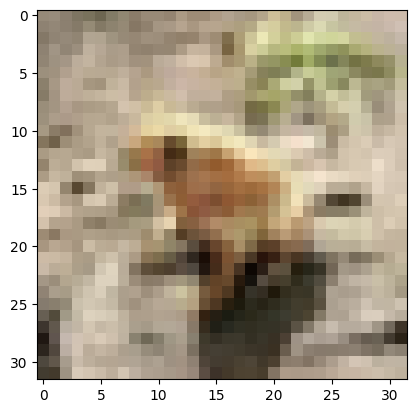

In [ ]:
digit=x_train[6000]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print ("Số máy là:",x_train[6000])

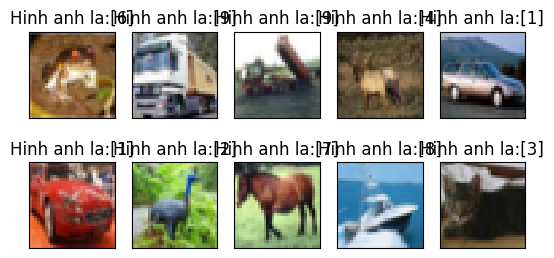

In [ ]:
for i in range(10):
    plt.subplot(3,5,i+1)
    plt.tight_layout
    plt.imshow(x_train[i],cmap='gray',
               interpolation='none')
    plt.title("Hinh anh la:{}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
from keras.models import Sequential #ANN theo tuần tự các lớp kết tiếp liên tục nhau 
from keras.layers import Dense # full conectel kết nối đầy đủ 
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,103,818
Trainable params: 2,103,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape((50000,32*32*3))  #chỉnh lại kích thước số dữ liệu đầu vào 
x_train = x_train.astype('float32')/255   #chuyển qua float để có thể chia được (dữ liệu từ 0->1)

x_test = x_test.reshape((10000,32*32*3))  
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
from keras.utils import to_categorical #lenh chuyen du lieu 
y_train=to_categorical(y_train,10) 
y_test=to_categorical(y_test,10) 
print(y_train.shape)

(50000, 10)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  
              metrics=['accuracy']) 
model.fit(x_train,y_train,epochs=20,batch_size=128)   
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/20
391/391 [==============================] - 20s 43ms/step - loss: 2.0419 - accuracy: 0.2624
Epoch 2/20
391/391 [==============================] - 16s 40ms/step - loss: 1.7933 - accuracy: 0.3548
Epoch 3/20
391/391 [==============================] - 16s 40ms/step - loss: 1.6998 - accuracy: 0.3876
Epoch 4/20
391/391 [==============================] - 16s 40ms/step - loss: 1.6213 - accuracy: 0.4173
Epoch 5/20
391/391 [==============================] - 17s 43ms/step - loss: 1.5645 - accuracy: 0.4398
Epoch 6/20
391/391 [==============================] - 16s 41ms/step - loss: 1.5160 - accuracy: 0.4575
Epoch 7/20
391/391 [==============================] - 17s 43ms/step - loss: 1.4780 - accuracy: 0.4714
Epoch 8/20
391/391 [==============================] - 17s 43ms/step - loss: 1.4398 - accuracy: 0.4863
Epoch 9/20
391/391 [==============================] - 16s 42ms/step - loss: 1.4067 - accuracy: 0.4987
Epoch 10/20
391/391 [==============================] - 16s 40ms/step - loss: 1.375

In [ ]:
model.save('tets1.h5')

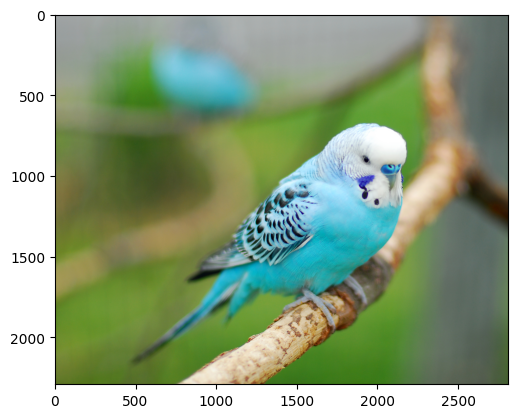

In [ ]:
img=plt.imread('/content/bird.jpg')
plt.imshow(img)
plt.show()

In [ ]:
import numpy as np
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
img = load_img('/content/car.jpg',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 130ms/step


array([0])